In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
data = pd.read_csv("covid_dataset.csv")

# label_encoder object using
label_encoder = preprocessing.LabelEncoder()
data['Day']= label_encoder.fit_transform(data['Day']) 
data.head(100)

,Day,Lab Test,Confirmed case,Death Case
0,0,434,9,2
1,1,367,18,1
2,2,468,35,3
3,3,679,41,5
4,4,981,54,3
...,...,...,...,...
95,96,15672,3489,46
96,97,15632,3360,41
97,98,13488,2949,37
98,99,11193,2686,30


In [3]:
data.shape

(626, 4)

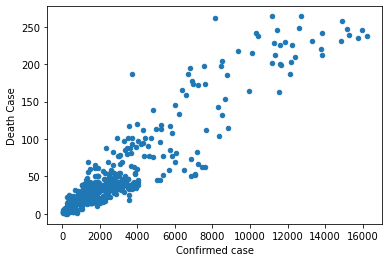

In [4]:
#Make prediction for Confirmed Case and Date case

data.plot(kind= 'scatter', x='Confirmed case', y='Death Case')
plt.show()

In [5]:
#test train Split

x_train, x_test, y_train, y_test = train_test_split(data['Confirmed case'], data['Death Case'], test_size=0.2)

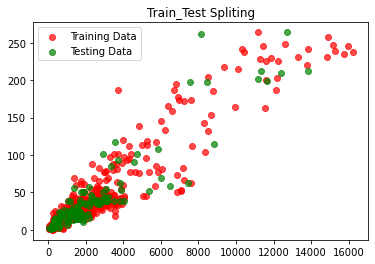

In [6]:
# test train split for vidualisation
plt.scatter(x_train, y_train, label = 'Training Data', color = 'r', alpha = .7)
plt.scatter(x_test, y_test, label = 'Testing Data', color = 'g', alpha = .7)
plt.legend()
plt.title('Train_Test Spliting')
plt.show()

In [7]:
L_reg = LinearRegression()
L_reg.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

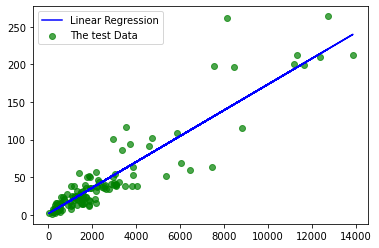

In [8]:
predict = L_reg.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, predict, label = 'Linear Regression', color = 'b')
plt.scatter(x_test, y_test, label = 'The test Data', color = 'g', alpha = .7)
plt.legend()
plt.show()

In [9]:
L_reg.predict([[8000]])[0]


139.0347925852846

In [10]:
L_reg.score(x_test.values.reshape(-1,1), y_test.values)

0.8481877411871288

In [11]:
pred_y = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': predict, 'Differenece Between Two Data': y_test - predict})
pred_y [0:10]

,Actual Data,Predicted Data,Differenece Between Two Data
530,51,33.454174,17.545826
45,21,22.944276,-1.944276
326,5,8.787735,-3.787735
214,21,27.519780,-6.519780
349,18,34.090617,-16.090617
436,54,53.889133,0.110867
224,14,27.760596,-13.760596
49,20,33.643387,-13.643387
413,38,19.108421,18.891579
107,50,51.790593,-1.790593
